Цель:

Ваша задача - построить модель классификации, которая сможет определить тип вина на основе его химических характеристик, используя алгоритм логистической регрессии. В процессе выполнения домашнего задания вы также научитесь визуализировать данные для анализа их распределения.



Данные:

Вам предоставлен набор данных о винах, который содержит различные химические характеристики вин, такие как содержание алкоголя, магния и других веществ, а также класс вина. Данные load_wine можно загрузить из библиотеки sklearn.datasets.



Задания:

1. Анализ структуры данных:

Выведите на экран первые 5 строк полученного DataFrame с помощью метода .head().

Выведите на экран список всех столбцов полученного DataFrame.

Используя методы info() и describe(), проведите базовый анализ структуры и основных статистических характеристик данных.

In [10]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine = datasets.load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)

In [5]:
data = pd.concat([X, y.rename('target')], axis=1)

In [6]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [9]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000



2. Визуализация данных:

Используйте seaborn для создания scatterplot, показывающего зависимость между содержанием алкоголя и уровнем магния в вине, с разделением по типу вина.

Создайте boxplot, отображающий распределение уровня алкоголя по сортам вина.

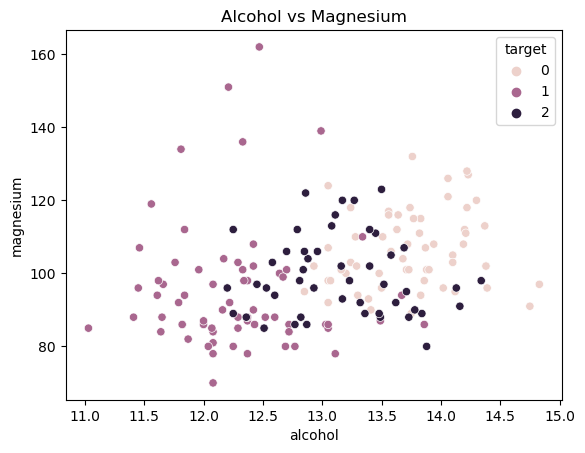

In [11]:
sns.scatterplot(x = 'alcohol', y = 'magnesium', data = data, hue = 'target')
plt.title('Alcohol vs Magnesium')
plt.show()

<Axes: xlabel='target', ylabel='alcohol'>

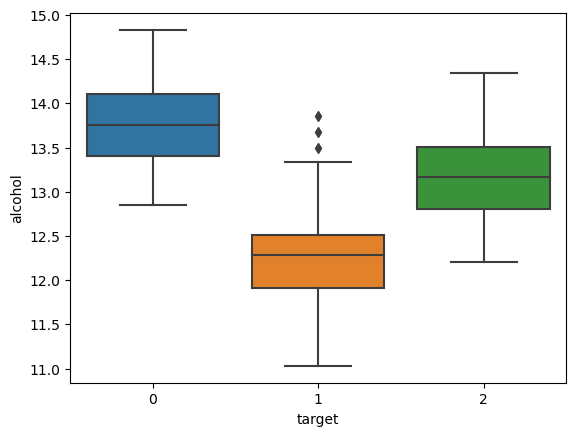

In [12]:
sns.boxplot(x = "target", y = "alcohol", data = data)

3.Создание и обучение модели логистической регрессии:

Создайте экземпляр модели LogisticRegression с параметрами max_iter=10000 и random_state=42. Обучите модель на обучающей выборке.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

4. Оценка производительности модели:

Сделайте предсказание на тестовых данных и вычислите точность модели с помощью accuracy_score. Проанализируйте результаты.

In [14]:
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [17]:
probabilities = model.predict_proba(X_test)
for i in range(probabilities.shape[0]):
    print(f"Наблюдение {i + 1}: Класс 1 - {probabilities[i][0]:.2f}, Класс 2 - {probabilities[i][1]:.2f}, Класс 3 - {probabilities[i][2]:.2f}")

Наблюдение 1: Класс 1 - 1.00, Класс 2 - 0.00, Класс 3 - 0.00
Наблюдение 2: Класс 1 - 1.00, Класс 2 - 0.00, Класс 3 - 0.00
Наблюдение 3: Класс 1 - 0.02, Класс 2 - 0.13, Класс 3 - 0.86
Наблюдение 4: Класс 1 - 1.00, Класс 2 - 0.00, Класс 3 - 0.00
Наблюдение 5: Класс 1 - 0.00, Класс 2 - 1.00, Класс 3 - 0.00
Наблюдение 6: Класс 1 - 1.00, Класс 2 - 0.00, Класс 3 - 0.00
Наблюдение 7: Класс 1 - 0.00, Класс 2 - 1.00, Класс 3 - 0.00
Наблюдение 8: Класс 1 - 0.01, Класс 2 - 0.00, Класс 3 - 0.99
Наблюдение 9: Класс 1 - 0.00, Класс 2 - 1.00, Класс 3 - 0.00
Наблюдение 10: Класс 1 - 0.07, Класс 2 - 0.01, Класс 3 - 0.92
Наблюдение 11: Класс 1 - 0.80, Класс 2 - 0.19, Класс 3 - 0.00
Наблюдение 12: Класс 1 - 0.00, Класс 2 - 0.00, Класс 3 - 1.00
Наблюдение 13: Класс 1 - 1.00, Класс 2 - 0.00, Класс 3 - 0.00
Наблюдение 14: Класс 1 - 0.00, Класс 2 - 0.98, Класс 3 - 0.02
Наблюдение 15: Класс 1 - 1.00, Класс 2 - 0.00, Класс 3 - 0.00
Наблюдение 16: Класс 1 - 0.00, Класс 2 - 1.00, Класс 3 - 0.00
Наблюдение 17: Кл